In [60]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate

import joblib

In [61]:
df=pd.read_csv("feature_enginered_products.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store             2885 non-null   object 
 1   category          2885 non-null   object 
 2   name              2885 non-null   object 
 3   product-link      2885 non-null   object 
 4   image_url         2885 non-null   object 
 5   cleaned_category  2885 non-null   object 
 6   cleaned_name      2885 non-null   object 
 7   cleaned_quantity  2885 non-null   float64
 8   cleaned_unit      2885 non-null   object 
 9   cleaned_price     2885 non-null   float64
dtypes: float64(2), object(8)
memory usage: 225.5+ KB
None


In [62]:
df["price_per_unit"]=df["cleaned_price"]/df["cleaned_quantity"]

In [63]:
predicted_df=pd.DataFrame(data=[],columns=list(df.columns)+["predicted_cleaned_price"])
predicted_df.to_csv("predicted_prices.csv",index=False)

Category: Baby Food, Number of items: 205
Modelling for  {'Baby Food'}


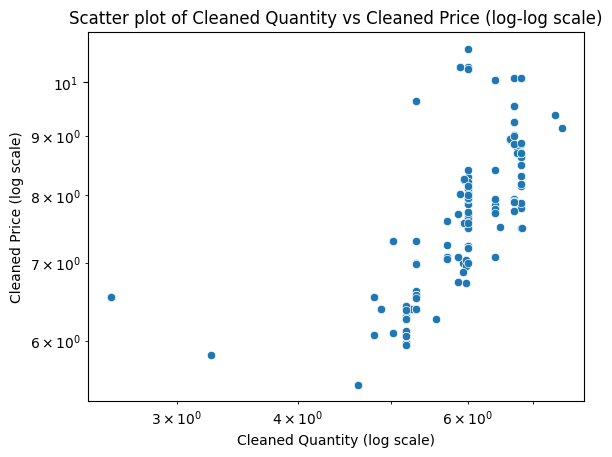

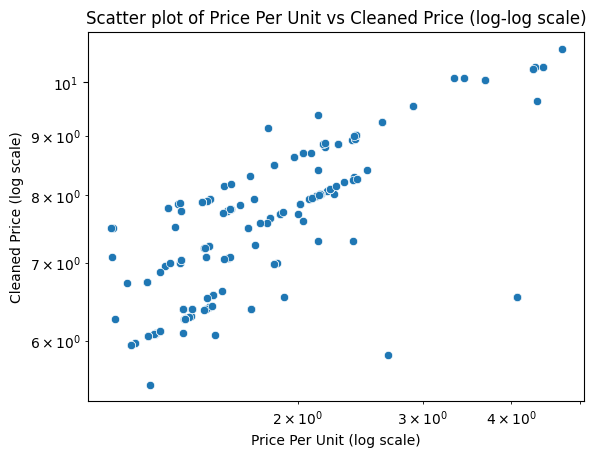

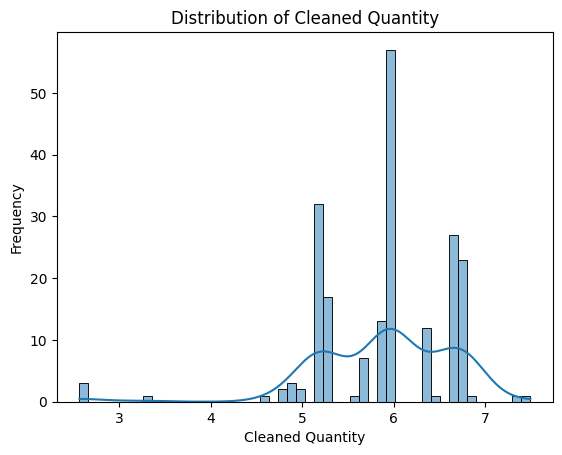

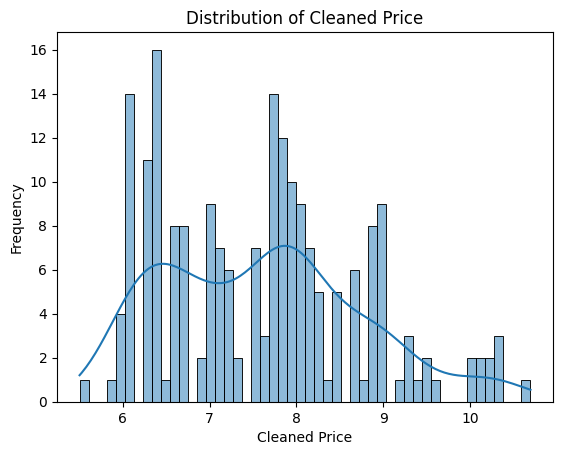

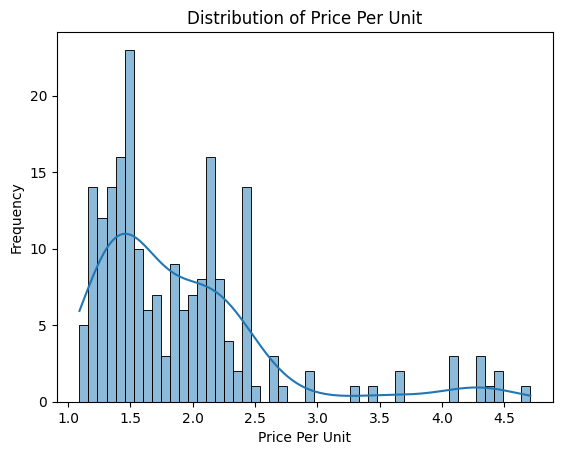

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Best CV Score (MSE): 0.0017980782437133698
Cross-Validation Results:
-0.0018852844139935735 0.9984971864604174
Training Results:
-0.0015518254696904963 0.9987618421802547
Test Results
 0.0024748438585463525 0.9981666233879964
############################################################################################################################################################################################################################################################################################################
Category: Beverages, Number of items: 1160
Modelling for  {'Beverages'}


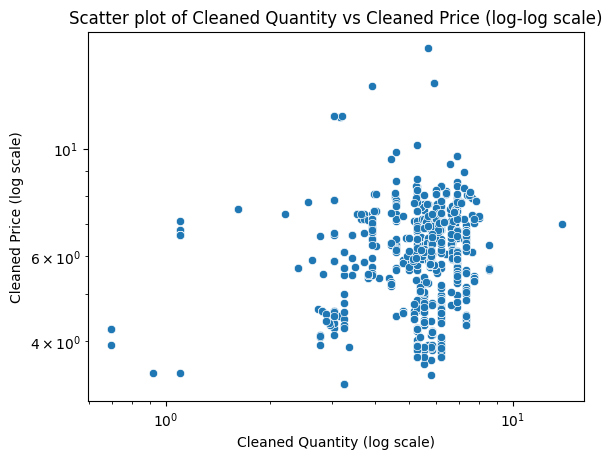

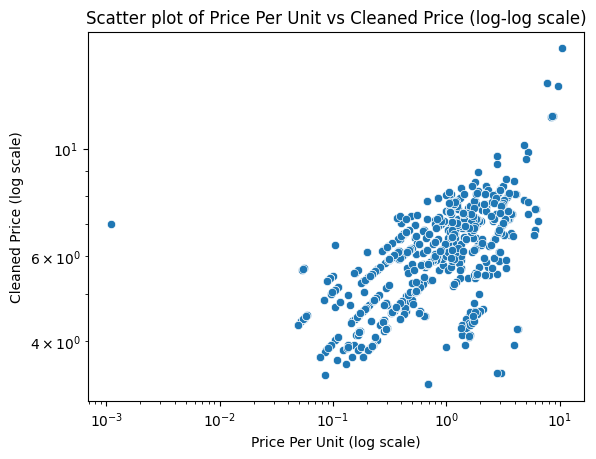

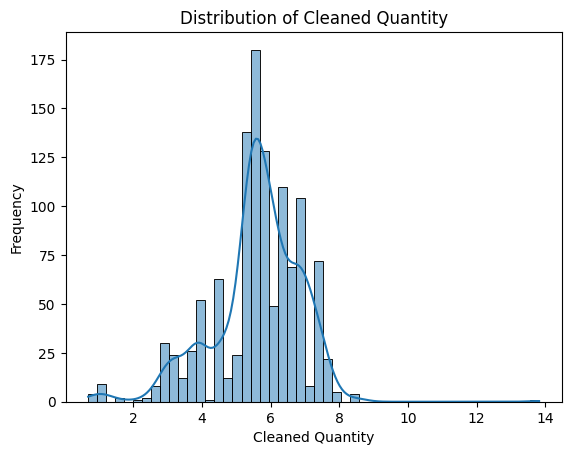

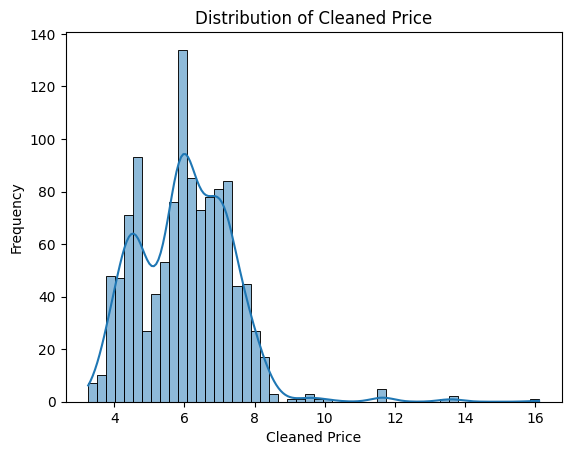

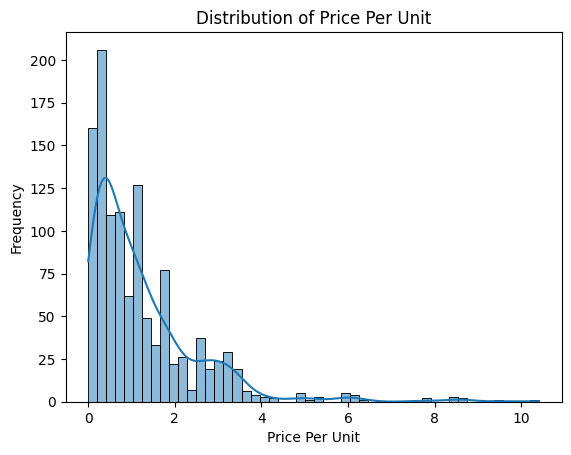

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Best CV Score (MSE): 0.2194803861702097
Cross-Validation Results:
-0.25034463020600417 0.8568936374556634
Training Results:
-0.188374800573468 0.8918607315006118
Test Results
 0.2051395329505314 0.9058730890434521
############################################################################################################################################################################################################################################################################################################
Category: Dairy, Number of items: 561
Modelling for  {'Dairy'}


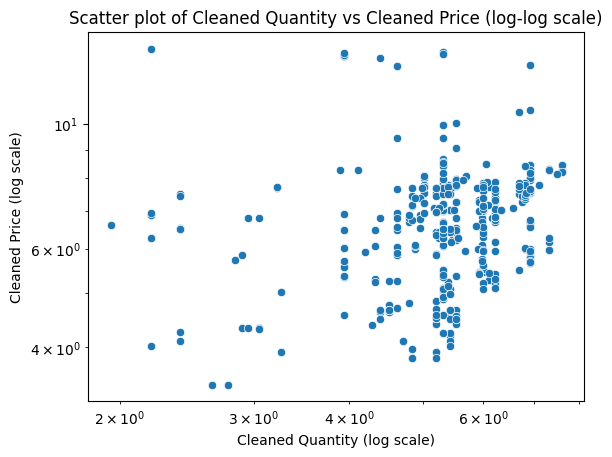

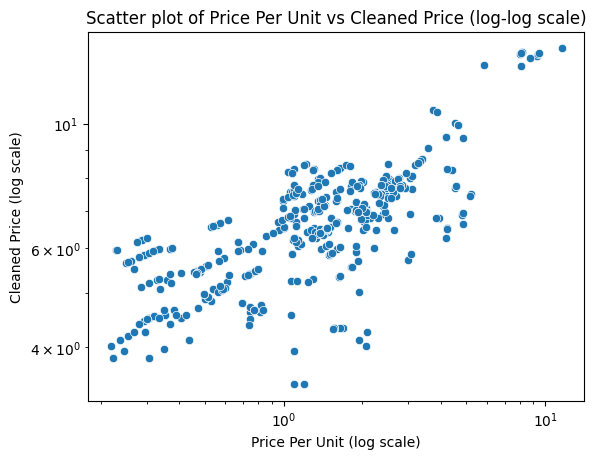

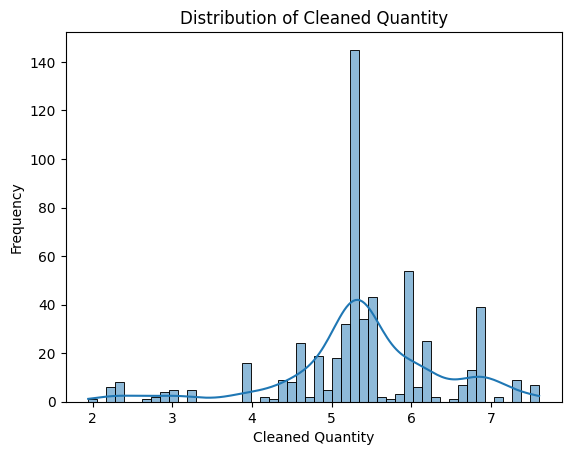

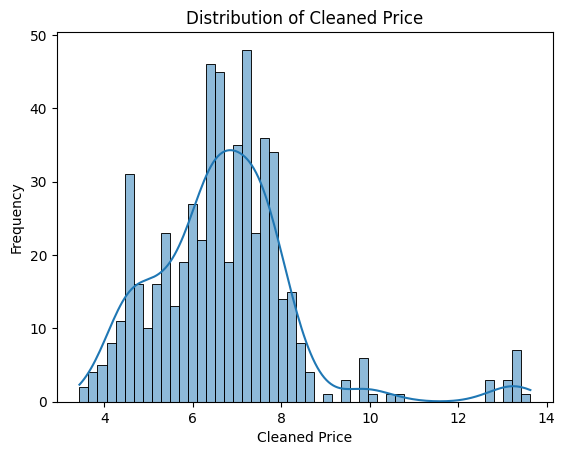

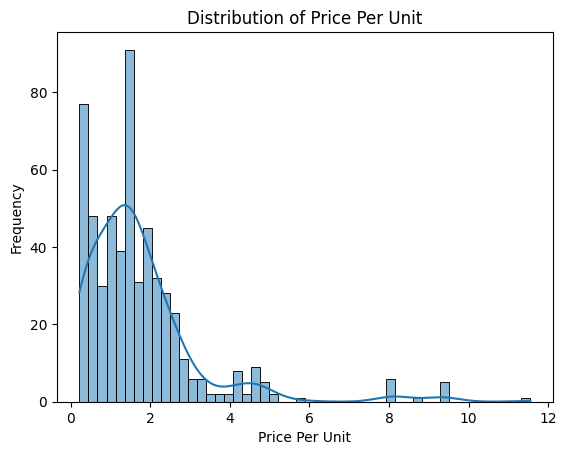

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Best CV Score (MSE): 0.06907734583499994
Cross-Validation Results:
-0.06892933246813668 0.9702076042157601
Training Results:
-0.05822545904907697 0.9748347792602319
Test Results
 0.06627878040314614 0.98319046614938
############################################################################################################################################################################################################################################################################################################
Category: Snacks, Number of items: 523
Modelling for  {'Snacks'}


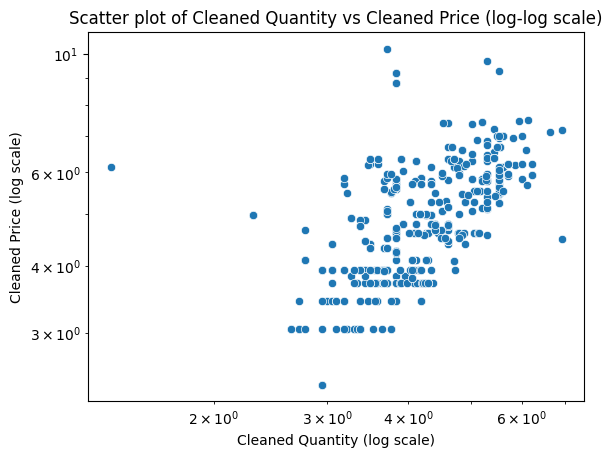

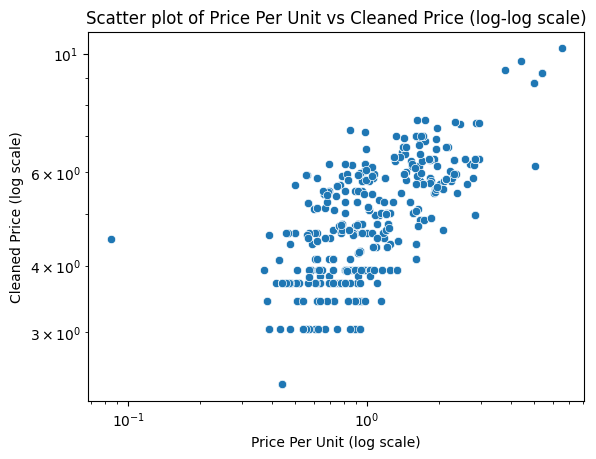

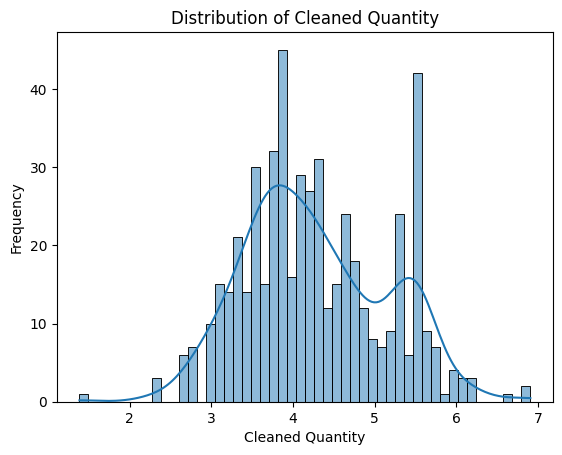

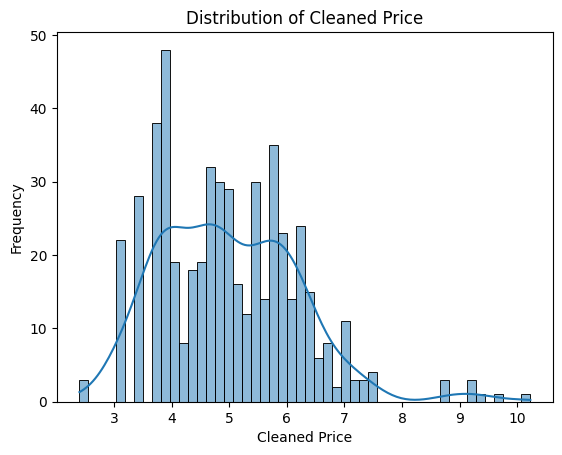

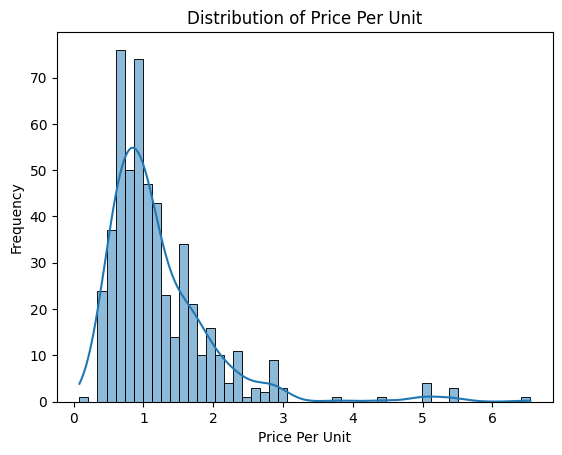

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.99}
Best CV Score (MSE): 0.034936069991204646
Cross-Validation Results:
-0.03395583330204079 0.9782319575000358
Training Results:
-0.024595573303381586 0.9841718138096888
Test Results
 0.015630259789255772 0.9865216242030127
############################################################################################################################################################################################################################################################################################################
Category: Spices & Seasonings, Number of items: 145
Modelling for  {'Spices & Seasonings'}


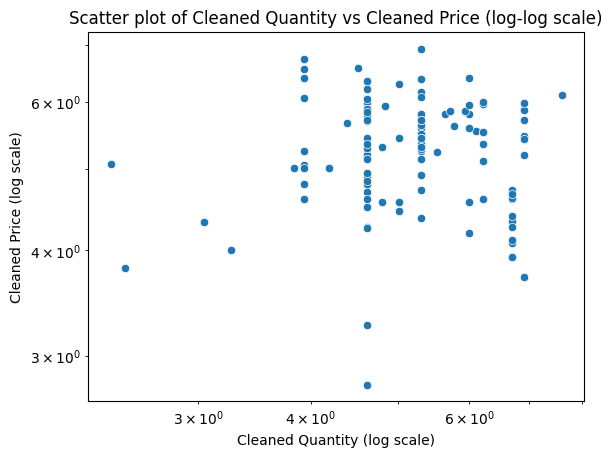

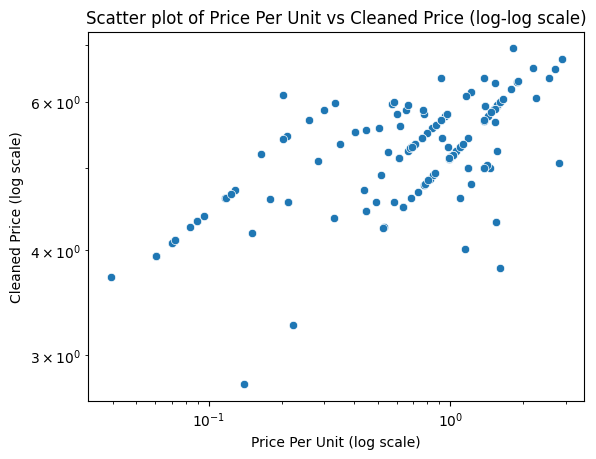

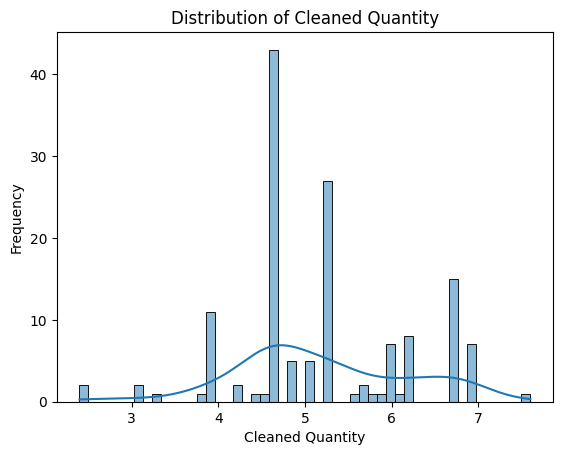

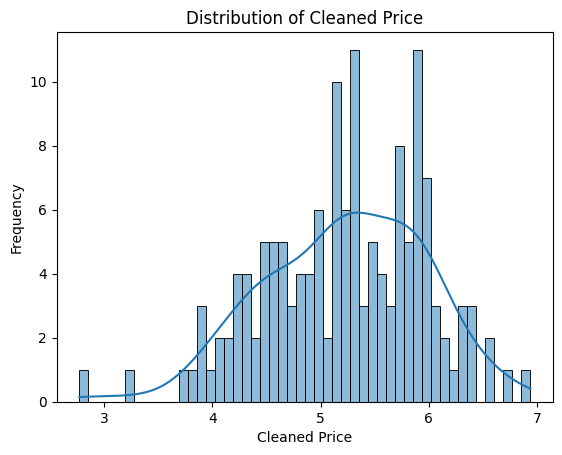

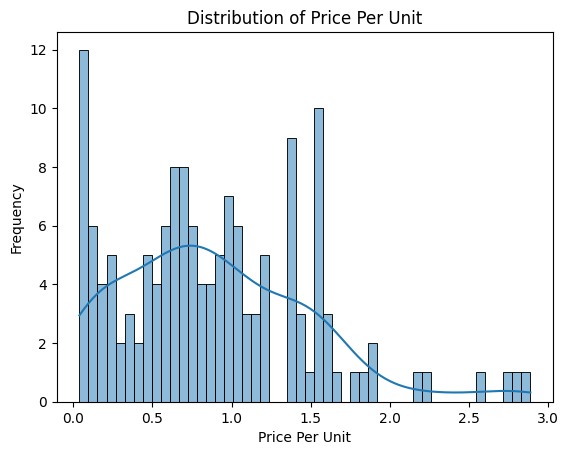

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.95}
Best CV Score (MSE): 0.19074276167881268
Cross-Validation Results:
-0.21320093368825227 0.6057125906282396
Training Results:
-0.1430684561152796 0.7340865859687096
Test Results
 0.08837636261308592 0.8272577441020132
############################################################################################################################################################################################################################################################################################################
Category: Staples, Number of items: 291
Modelling for  {'Staples'}


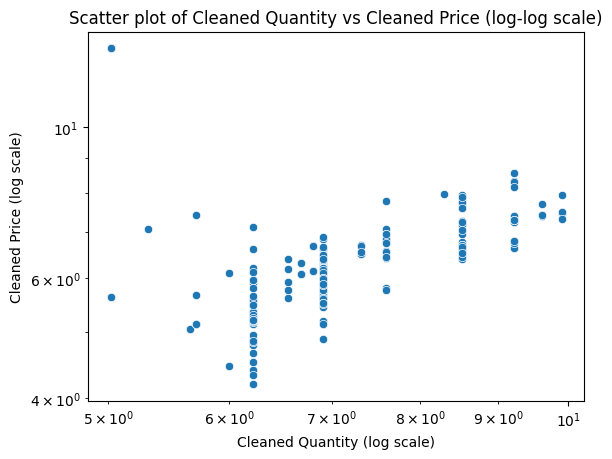

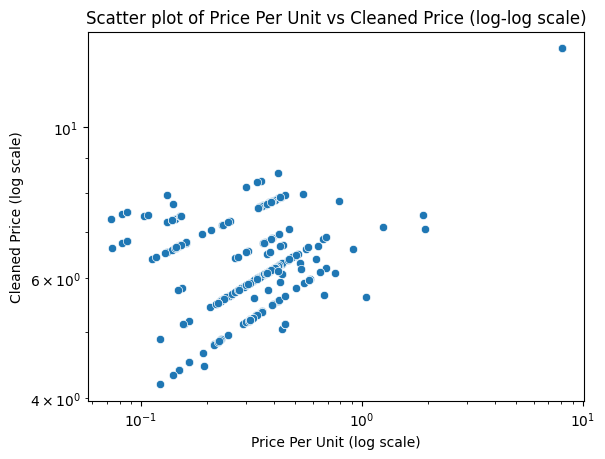

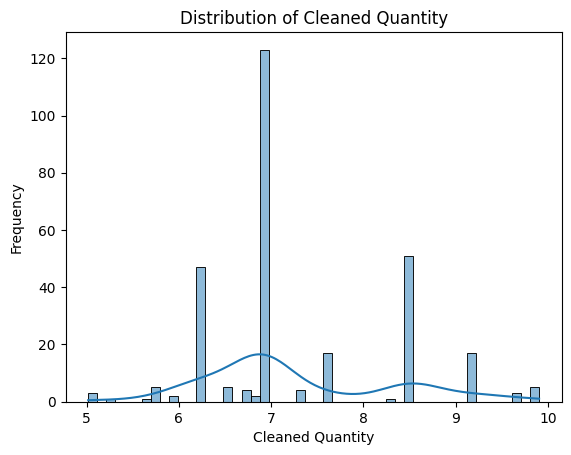

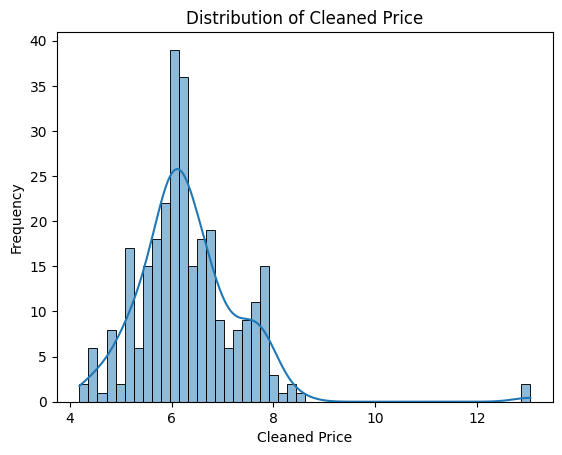

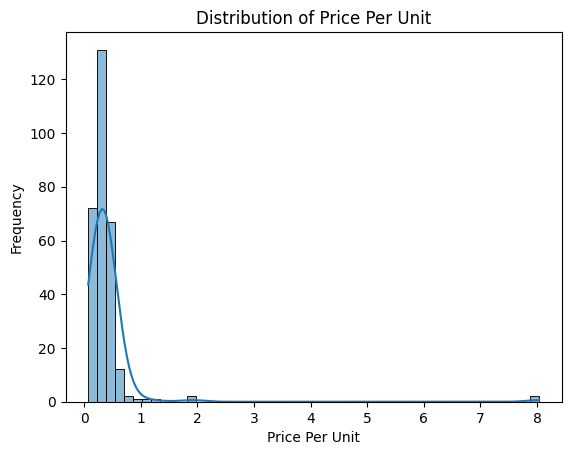

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Best CV Score (MSE): 0.2546147627879938
Cross-Validation Results:
-0.22462660902139997 0.8026163414507066
Training Results:
-0.13737561919272184 0.8652544583491266
Test Results
 0.10468380898003485 0.8143066704423458
############################################################################################################################################################################################################################################################################################################


In [64]:
#want ti run a model on every category seperately

df_goruped=df.groupby("cleaned_category")

for name, group in df_goruped:
    print(f"Category: {name}, Number of items: {len(group)}") 
    print("Modelling for ",{name})
    model_df=group
    model_df=pd.get_dummies(model_df, columns=['category','store','cleaned_category',"cleaned_unit"],prefix=['category','store',"cleaned_category","cleaned_unit"], drop_first=True)
    model_df.drop([
    "name"  ,     
    "product-link" ,    
    "image_url"  ,
    "cleaned_name"
    ], axis=1, inplace=True)
    model_df["cleaned_quantity"]=np.log1p(model_df["cleaned_quantity"])
    model_df["price_per_unit"]=np.log1p(model_df["price_per_unit"])
    model_df["cleaned_price"]=np.log1p(model_df["cleaned_price"])
    
    X= model_df.drop("cleaned_price", axis=1)
    y= model_df["cleaned_price"]

    sns.scatterplot(x=model_df["cleaned_quantity"], y=model_df["cleaned_price"])
    plt.xlabel("Cleaned Quantity (log scale)")
    plt.ylabel("Cleaned Price (log scale)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Scatter plot of Cleaned Quantity vs Cleaned Price (log-log scale)")
    plt.show()

    sns.scatterplot(x=model_df["price_per_unit"], y=model_df["cleaned_price"])
    plt.xlabel("Price Per Unit (log scale)")
    plt.ylabel("Cleaned Price (log scale)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Scatter plot of Price Per Unit vs Cleaned Price (log-log scale)")
    plt.show()
    
    
    #histogram of cleaned_quantity
    sns.histplot(model_df['cleaned_quantity'], bins=50, kde=True)
    plt.title('Distribution of Cleaned Quantity')
    plt.xlabel('Cleaned Quantity')
    plt.ylabel('Frequency')
    plt.show()

    sns.histplot(model_df['cleaned_price'], bins=50, kde=True)
    plt.title('Distribution of Cleaned Price')
    plt.xlabel('Cleaned Price')
    plt.ylabel('Frequency')
    plt.show()

    sns.histplot(model_df['price_per_unit'], bins=50, kde=True)
    plt.title('Distribution of Price Per Unit')
    plt.xlabel('Price Per Unit')
    plt.ylabel('Frequency')
    plt.show()
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )
    
    param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]  # Mix of L1 and L2
    }

    # Initialize Elastic Net
    elastic_net = ElasticNet(max_iter=10000, random_state=42)

    # GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(
        estimator=elastic_net,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_squared_error',
        n_jobs=-1,  # Use all CPU cores
        verbose=1
    )

    # Fit on training data
    grid_search.fit(X_train, y_train)

    # Best parameters
    print("\nBest Parameters:", grid_search.best_params_)
    print("Best CV Score (MSE):", -grid_search.best_score_)
    
    model = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'], max_iter=10000, random_state=42)

    cv_scores = cross_validate(
    model,
    X_train,
    y_train,
    cv=2,
    scoring=['neg_mean_squared_error', 'r2'],
    return_train_score=True
    )
    
    print("Cross-Validation Results:")
    print(cv_scores['test_neg_mean_squared_error'].mean(), cv_scores['test_r2'].mean())
    print("Training Results:")
    print(cv_scores['train_neg_mean_squared_error'].mean(), cv_scores['train_r2'].mean())
    
    y_true=y_test
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
    mse = mean_squared_error(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)
    print("Test Results\n", mse, test_r2)
    
    print("#"*300)
    
    predicted_prices=model.predict(X)
    predicted_prices=np.expm1(predicted_prices)
    predicted_prices=pd.DataFrame(predicted_prices, columns=["predicted_cleaned_price"],index=X.index)
    predicted_df=pd.concat([group, predicted_prices], axis=1)
    predicted_df.to_csv("predicted_prices.csv",
    mode='a',      # Crucial: 'a' for append
    header=False,  # Crucial: Do not write the header again
    index=False    # Standard practice: Do not write the DataFrame index
    )
    